In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
data1 = pd.read_csv('acs2015_county_data.csv')
data1.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [3]:
# These are the columns for the "County Data"
data1.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [4]:
data1.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [5]:
data1.dtypes

CensusId             int64
State               object
County              object
TotalPop             int64
Men                  int64
Women                int64
Hispanic           float64
White              float64
Black              float64
Native             float64
Asian              float64
Pacific            float64
Citizen              int64
Income             float64
IncomeErr          float64
IncomePerCap         int64
IncomePerCapErr      int64
Poverty            float64
ChildPoverty       float64
Professional       float64
Service            float64
Office             float64
Construction       float64
Production         float64
Drive              float64
Carpool            float64
Transit            float64
Walk               float64
OtherTransp        float64
WorkAtHome         float64
MeanCommute        float64
Employed             int64
PrivateWork        float64
PublicWork         float64
SelfEmployed       float64
FamilyWork         float64
Unemployment       float64
d

In [6]:
data1.shape

(3220, 37)

In [7]:
# get unique values in "State" 
print(set(data1['State']))

{'Maine', 'Wyoming', 'Delaware', 'Idaho', 'Hawaii', 'Washington', 'California', 'Missouri', 'North Dakota', 'Virginia', 'Kansas', 'Wisconsin', 'Kentucky', 'New Jersey', 'South Carolina', 'Massachusetts', 'Florida', 'Colorado', 'New Mexico', 'Oklahoma', 'New York', 'Oregon', 'Rhode Island', 'Ohio', 'Georgia', 'Indiana', 'Arkansas', 'Connecticut', 'New Hampshire', 'Iowa', 'Michigan', 'Minnesota', 'Louisiana', 'Illinois', 'Puerto Rico', 'Montana', 'Nevada', 'Alaska', 'North Carolina', 'Arizona', 'South Dakota', 'West Virginia', 'Vermont', 'Nebraska', 'Utah', 'Pennsylvania', 'Alabama', 'Texas', 'Mississippi', 'Tennessee', 'Maryland', 'District of Columbia'}


In [8]:
# county counts for each state
county = data1[['State','County']].groupby('State').agg('count')
county.sort_values('County', ascending = 0)

,County
State,
Texas,254
Georgia,159
Virginia,133
Kentucky,120
Missouri,115
Kansas,105
Illinois,102
North Carolina,100
Iowa,99


In [8]:
# group by state 
agg_df = data1.groupby('State').sum()

# order by total population 
agg_df.sort_values('TotalPop', ascending = 0)

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
State,,,,,,,,,,,,,,,,,,,,,
California,351364,38421464,19087135,19334329,1712.1,3222.3,173.3,91.6,400.1,19.9,...,207.6,156.2,373.3,1448.0,17246360,4075.7,1147.1,551.6,27.3,626.4
Texas,12256516,26538614,13171316,13367298,8573.8,14573.7,1589.2,97.2,235.7,14.2,...,614.1,382.1,1007.0,5692.2,12094262,18369.0,4692.0,2261.3,78.4,1711.5
New York,2235844,19673174,9541801,10131373,457.8,5071.0,358.1,23.9,168.0,0.8,...,302.1,97.5,256.0,1574.9,9254578,4633.8,1150.1,402.2,13.9,487.2
Florida,808550,19645772,9600009,10045763,888.1,4601.2,955.8,24.9,101.1,3.4,...,103.8,155.8,303.8,1738.5,8541291,5052.5,1217.8,418.2,11.3,695.7
Illinois,1744404,12873761,6316899,6556862,475.9,8911.2,525.8,14.4,117.2,1.2,...,262.8,126.0,406.0,2403.3,6086226,8017.4,1488.9,673.6,19.8,813.4
Pennsylvania,2818489,12779559,6245344,6534215,263.3,5946.6,296.2,8.3,90.4,0.8,...,250.4,78.5,265.4,1681.1,6001889,5469.2,809.4,407.4,13.7,484.4
Ohio,3439744,11575977,5662893,5913084,218.1,7974.5,358.0,12.6,75.5,1.4,...,207.9,103.4,296.1,2142.4,5366673,7146.0,1135.2,501.4,17.4,700.3
Georgia,2092677,10006693,4883331,5123362,966.6,10035.1,4450.8,25.5,179.0,4.2,...,278.1,275.9,561.1,4045.6,4388274,11831.5,3022.2,1015.8,29.8,1585.9
Michigan,2164889,9900571,4861973,5038598,274.5,7341.5,325.1,104.5,81.0,1.1,...,248.1,118.0,351.5,1900.0,4373518,6613.2,1122.1,540.9,24.5,826.9


In [9]:
# Create a new dataset which contains data of states with top 5 total population
ca = data1.groupby('State').get_group('California')
tx = data1.groupby('State').get_group('Texas')
ny = data1.groupby('State').get_group('New York')
fl = data1.groupby('State').get_group('Florida')
il = data1.groupby('State').get_group('Illinois')
pn = data1.groupby('State').get_group('Pennsylvania')
df_6 = pd.concat([ca,tx,ny,fl,il,pn])
df_6.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
186,6001,California,Alameda,1584983,776699,808284,22.6,33.0,11.3,0.3,...,3.7,3.5,5.6,30.7,778132,78.7,13.8,7.4,0.1,8.3
187,6003,California,Alpine,1131,654,477,9.5,64.1,1.0,19.4,...,8.4,1.8,13.7,24.3,408,57.4,32.8,9.8,0.0,10.7
188,6005,California,Amador,36995,20012,16983,12.9,79.7,2.2,1.8,...,3.6,0.9,5.6,29.3,12573,64.5,23.4,11.8,0.3,14.0
189,6007,California,Butte,222564,110115,112449,15.2,73.8,1.4,0.7,...,3.7,3.9,5.8,19.9,89411,71.8,17.3,10.5,0.5,12.1
190,6009,California,Calaveras,44767,22143,22624,11.1,82.5,0.6,0.9,...,1.9,0.8,7.5,33.6,16248,65.2,20.3,13.9,0.6,12.1


In [10]:
agg_df.dtypes

CensusId             int64
TotalPop             int64
Men                  int64
Women                int64
Hispanic           float64
White              float64
Black              float64
Native             float64
Asian              float64
Pacific            float64
Citizen              int64
Income             float64
IncomeErr          float64
IncomePerCap         int64
IncomePerCapErr      int64
Poverty            float64
ChildPoverty       float64
Professional       float64
Service            float64
Office             float64
Construction       float64
Production         float64
Drive              float64
Carpool            float64
Transit            float64
Walk               float64
OtherTransp        float64
WorkAtHome         float64
MeanCommute        float64
Employed             int64
PrivateWork        float64
PublicWork         float64
SelfEmployed       float64
FamilyWork         float64
Unemployment       float64
dtype: object

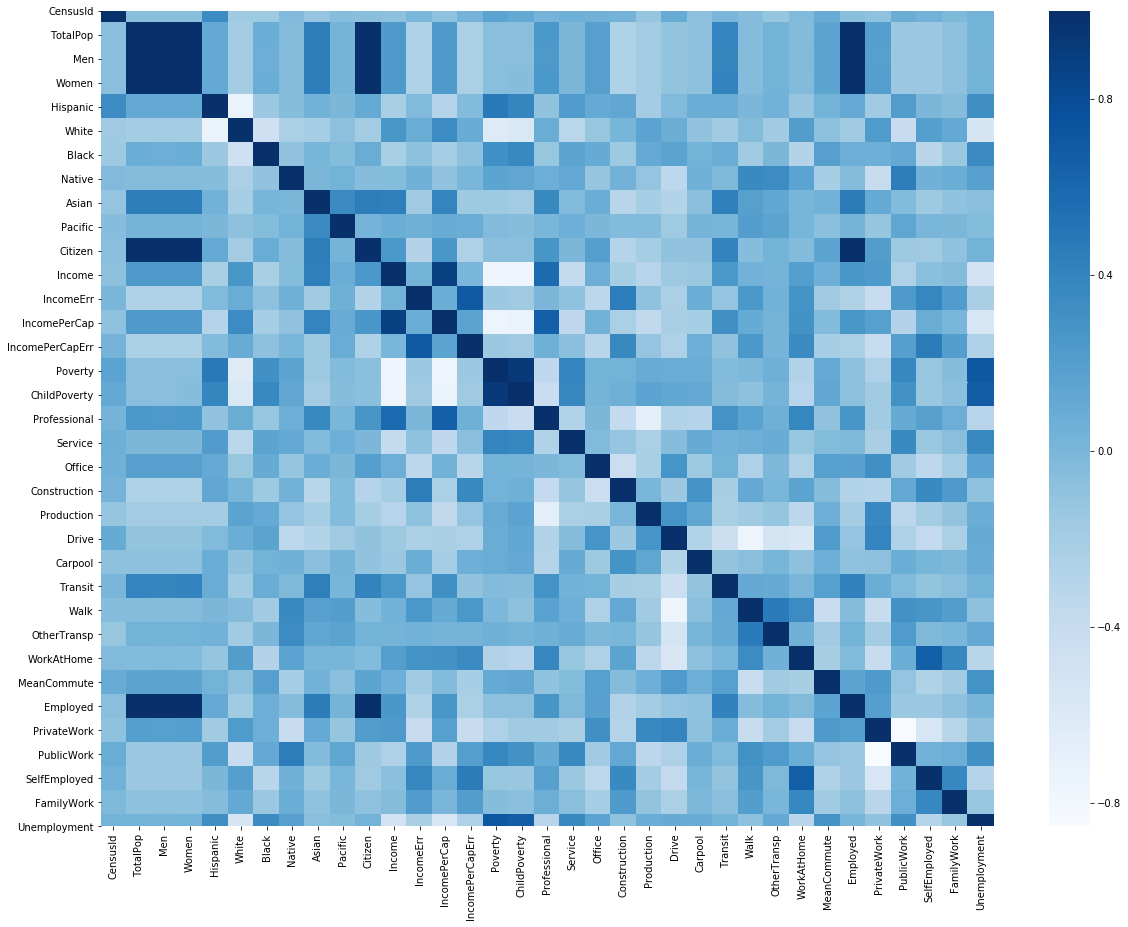

In [11]:
# Correlation heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
corr = data1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap = "Blues")

In [12]:
corr.IncomePerCap

CensusId          -0.086881
TotalPop           0.238516
Men                0.237878
Women              0.239075
Hispanic          -0.294180
White              0.345323
Black             -0.207272
Native            -0.095884
Asian              0.403223
Pacific            0.090034
Citizen            0.257302
Income             0.889695
IncomeErr          0.076816
IncomePerCap       1.000000
IncomePerCapErr    0.153494
Poverty           -0.756930
ChildPoverty      -0.735478
Professional       0.655480
Service           -0.351330
Office             0.037945
Construction      -0.230885
Production        -0.356811
Drive             -0.227259
Carpool           -0.204285
Transit            0.311441
Walk               0.101142
OtherTransp        0.029183
WorkAtHome         0.299546
MeanCommute       -0.034978
Employed           0.264614
PrivateWork        0.191792
PublicWork        -0.284536
SelfEmployed       0.087274
FamilyWork         0.005932
Unemployment      -0.547596
Name: IncomePerCap, 

In [13]:
data1.isnull().sum().sort_values(ascending=False)

ChildPoverty       1
IncomeErr          1
Income             1
Poverty            0
IncomePerCap       0
Citizen            0
Pacific            0
Asian              0
Native             0
Black              0
White              0
Hispanic           0
Women              0
Men                0
TotalPop           0
County             0
State              0
IncomePerCapErr    0
Unemployment       0
FamilyWork         0
Professional       0
SelfEmployed       0
PublicWork         0
PrivateWork        0
Employed           0
MeanCommute        0
WorkAtHome         0
OtherTransp        0
Walk               0
Transit            0
Carpool            0
Drive              0
Production         0
Construction       0
Office             0
Service            0
CensusId           0
dtype: int64

In [14]:
data1 = data1.dropna()
data1.shape

(3218, 37)

In [15]:
data1.isnull().sum().sort_values(ascending=False)

Unemployment       0
Poverty            0
IncomePerCap       0
IncomeErr          0
Income             0
Citizen            0
Pacific            0
Asian              0
Native             0
Black              0
White              0
Hispanic           0
Women              0
Men                0
TotalPop           0
County             0
State              0
IncomePerCapErr    0
ChildPoverty       0
FamilyWork         0
Professional       0
SelfEmployed       0
PublicWork         0
PrivateWork        0
Employed           0
MeanCommute        0
WorkAtHome         0
OtherTransp        0
Walk               0
Transit            0
Carpool            0
Drive              0
Production         0
Construction       0
Office             0
Service            0
CensusId           0
dtype: int64

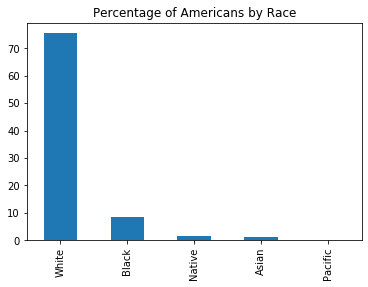

In [16]:
#Lets see how many of each race is in the US as a percentage of the total 
race_columns = ['White','Black','Native','Asian','Pacific']
census_races =data1[race_columns]

#There are more white people than black people as expected
(census_races.sum()/len(census_races)).plot.bar(title = "Percentage of Americans by Race")

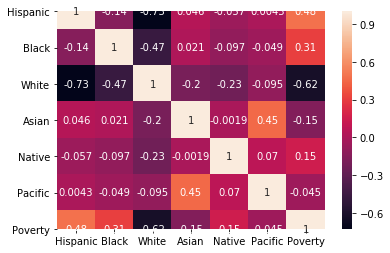

In [17]:
f = ( data1.loc[:, ['Hispanic', 'Black', 'White', 'Asian', 'Native','Pacific','Poverty']]).corr()

sns.heatmap(f, annot=True)

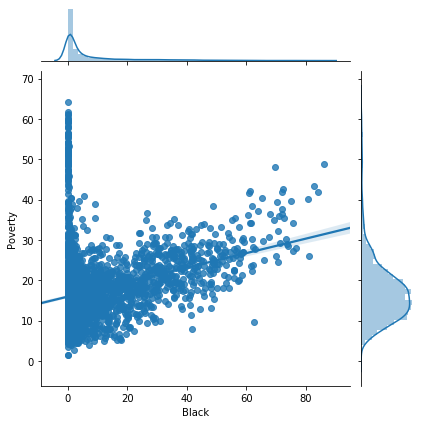

In [18]:
#Although there are many non-black areas stricken with poverty, it is clear to see as the percentage black increases, poverty does too
sns.jointplot(x='Black', y='Poverty', data=data1, kind="reg")

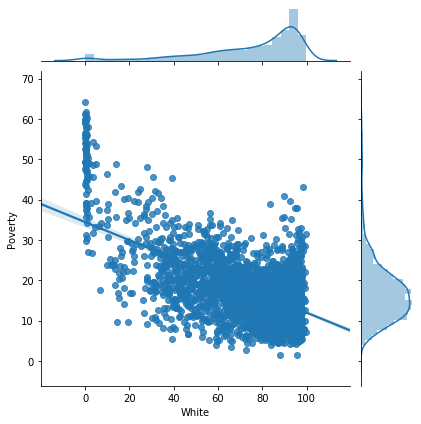

In [19]:
#it's interesting to see that as percent White increases, poverty levels decrease until about 80% white. However, they rise again afterwards. Maybe this is due to rural farm communities?
sns.jointplot(x="White",y="Poverty", data = data1, kind="reg")

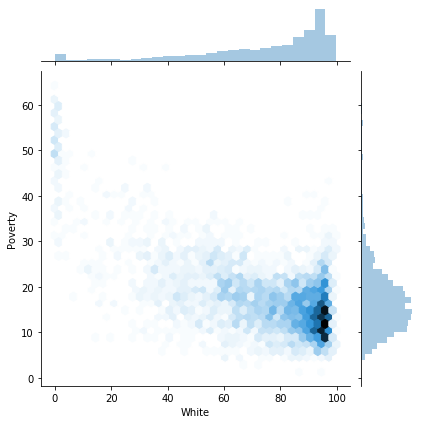

In [20]:
#This plot shows the above information, but it really shows how white most Counties in America are.
sns.jointplot(x="White",y="Poverty", data = data1, kind = "hex")

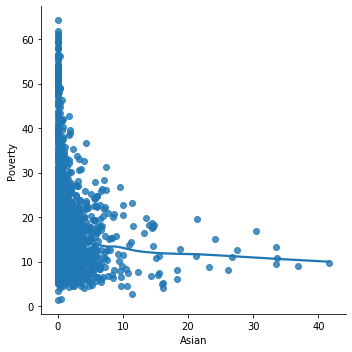

In [21]:
#Asian percentages are also inversely correlated with poverty, however, you can see that the communities that are very strongly asian, there is limited poverty. The correlation may be a little misleading in this case since
#I think the strength of the relationship is more powerful than the value implies.
sns.lmplot(x="Asian", y= "Poverty", data = data1, lowess=True)

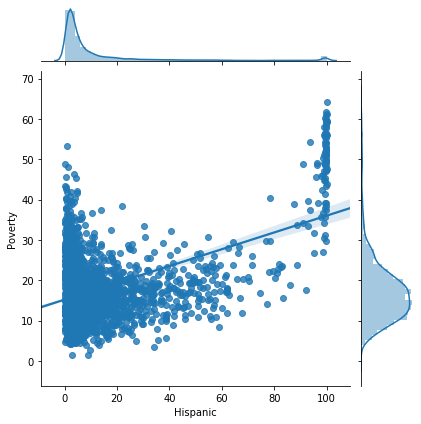

In [22]:
#There are two interesting pieces of information. 1: There are areas in the US which are almost 100% hispanic. 2: These areas are very poor.
sns.jointplot(x="Hispanic",y = "Poverty",data = data1, kind="reg")

# Model

In [23]:
#create test and trainning datasets
from sklearn.model_selection import train_test_split
x, y = data1.iloc[ :, 3:].values, data1.IncomePerCap.values
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [24]:
z=data1.Income.values
z

array([51281., 50254., 32964., ..., 17818., 15627., 14708.])

In [25]:
X_train.shape, X_test.shape

((2252, 34), (966, 34))

In [26]:
y_train.shape, y_test.shape

((2252,), (966,))

In [27]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [28]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [29]:
lm.fit(X_train,y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [30]:
# print the intercept
print(lm.intercept_)

2.4374458007514477e-10


In [31]:
print(lm.coef_)

[ 2.81118716e-16  3.34801631e-16 -2.66713734e-16 -9.57167114e-13
 -9.42535241e-13 -1.01040770e-12 -1.06147618e-12 -4.75211946e-15
  8.58712907e-13 -1.99710040e-16 -7.80828852e-17  6.69360163e-16
  1.00000000e+00 -4.86677179e-16  3.87334094e-14  3.71387931e-14
 -2.66477132e-13 -3.01400454e-13 -3.72037397e-13 -2.76871444e-13
 -3.08846382e-13 -1.10349621e-12 -1.09918080e-12 -1.13782268e-12
 -1.09199672e-12 -1.08973655e-12 -1.17122879e-12 -3.91224027e-14
  1.80194401e-16 -1.63102659e-13 -1.76805536e-13 -1.91951076e-13
 -3.17025330e-13 -3.85198294e-14]


In [32]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

pred = rf_model.predict(X_train)
print('rf train mse: {}'.format(mean_squared_error(y_train, pred)))
pred = rf_model.predict(X_test)
print('rf test mse: {}'.format(mean_squared_error(y_test, pred)))

/Users/baji/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rf train mse: 42941.67067051512
rf test mse: 69389.71766045544


In [33]:
from sklearn.preprocessing import StandardScaler
# fit scaler
scaler = StandardScaler() # create an instance
scaler.fit(X_train) #  fit  the scaler to the train set for later use

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
SVR_model = SVR()
SVR_model.fit(scaler.transform(X_train), y_train)

pred = SVR_model.predict(scaler.transform(X_train))
print('SVR train mse: {}'.format(mean_squared_error(y_train, pred)))
pred = SVR_model.predict(scaler.transform(X_test))
print('SVR test mse: {}'.format(mean_squared_error(y_test, pred)))

SVR train mse: 37653206.6717112
SVR test mse: 37843271.52007411


In [35]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

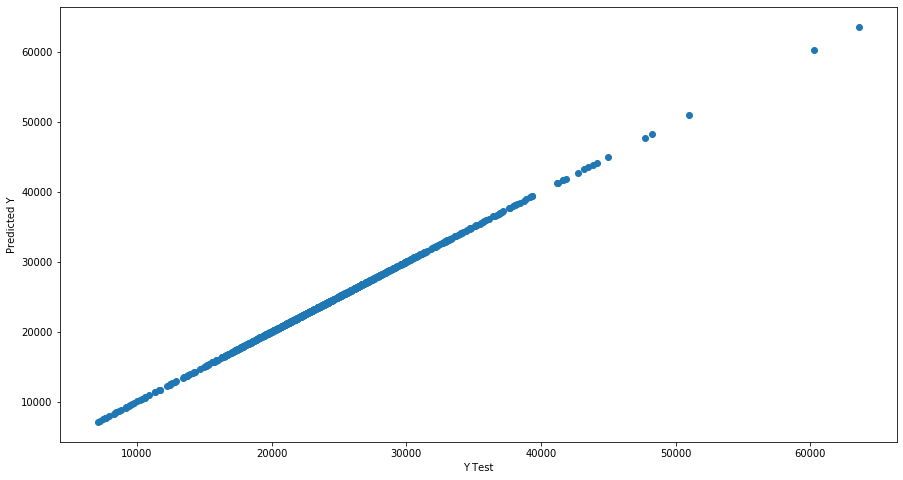

In [36]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

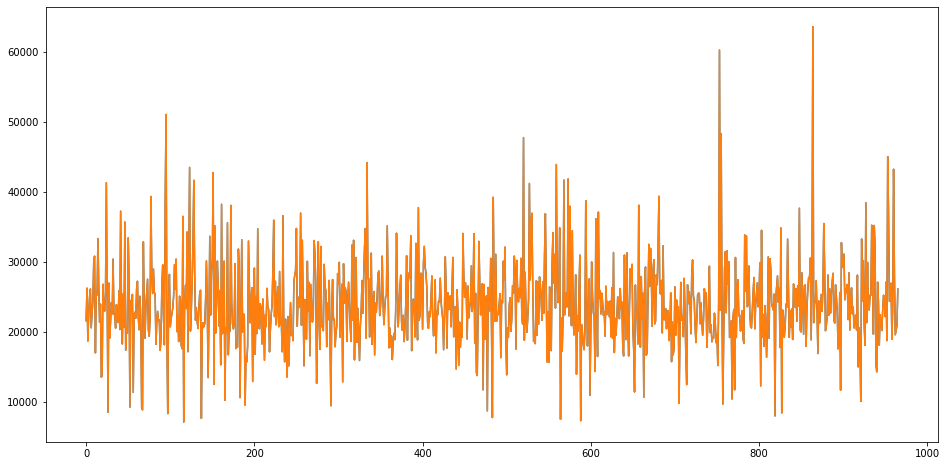

In [37]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.show()

In [38]:
rf_pred= rf_model.predict(X_test)
rf_pred = rf_pred.reshape(-1,1)

In [39]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.056504761734611e-11
MSE: 6.3956440401903335e-21
RMSE: 7.997277061719403e-11
